**TECH CHALLENGE - 4IADT**

Rodrigo de Souza Lopes - RM360283

Vitor Luiz Silva Paes - RMxxxxxx

Tech Challenge é o projeto que engloba os conhecimentos obtidos em
todas as disciplinas dessa fase. Esta é uma atividade que, em princípio, deve
ser desenvolvida em grupo

**FASE 1 - Exploração de dados:**

● Realize a limpeza dos dados, tratando valores ausentes (se
necessário);

● Converta variáveis categóricas em formatos adequados para
modelagem.

● Carregue a base de dados e explore suas características;

● Analise estatísticas descritivas e visualize distribuições relevantes.

Inicialmente tentamos buscar esses valores da ANS, porém ali faltavam métricas, principalmente
as de encargos, que são a base para a análise preditiva.
Optamos por seguir com uma base amostral dos EUA, retirada da fonte Kaggle (Medical Insurance Payout).
Foi realizado primeiro a tradução das palavras e valores do modelo americano
para o brasileiro de todos os atributos, correção das casas decimais dos valores de IMC e de encargos,
as convertendo para os formatos adequados para a modelagem.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


   idade       sexo  imc  filhos fumante   regiao  encargos
0     18  masculino   23       0     nao  sudeste      1121
1     18  masculino   30       0     nao  sudeste      1131
2     18  masculino   33       0     nao  sudeste      1135
3     18  masculino   33       0     nao  sudeste      1136
4     18  masculino   34       0     nao  sudeste      1137


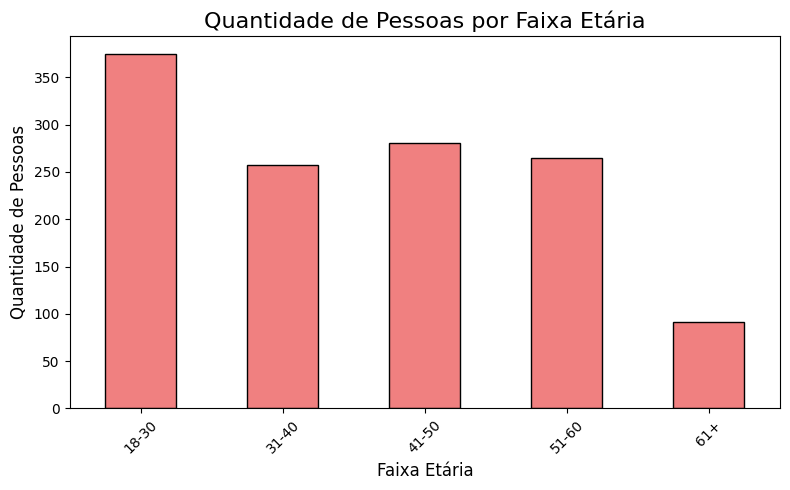

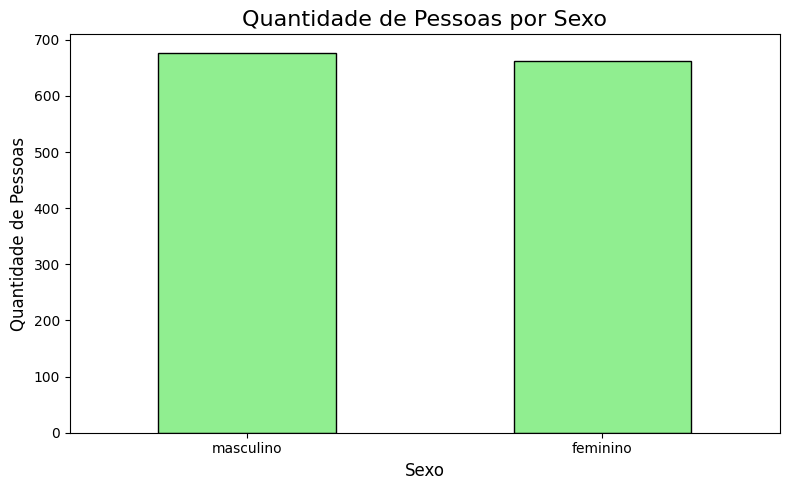

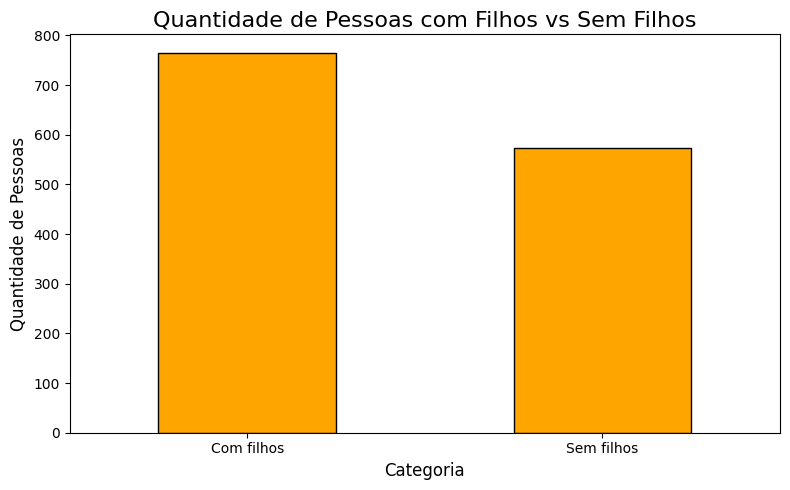

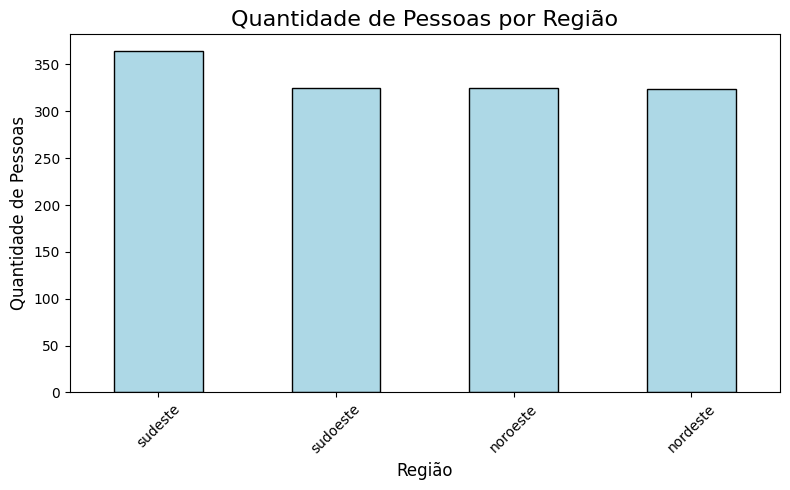

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o dataset
df = pd.read_csv('/content/sample_data/BaseMedica.csv')

# Exibir as primeiras linhas do DataFrame para verificar as colunas
print(df.head())

# Remover espaços extras nos nomes das colunas
df.columns = df.columns.str.strip()

# Agrupando as idades em faixas etárias
faixas_etarias = pd.cut(df['idade'], bins=[18, 30, 40, 50, 60, 100], right=True, labels=["18-30", "31-40", "41-50", "51-60", "61+"])
quantidade_faixa_etaria = faixas_etarias.value_counts().sort_index()

# Quantidade de pessoas por sexo
quantidade_sexo = df['sexo'].value_counts()

# Quantidade de pessoas com filhos > 0 e sem filhos (filhos == 0)
quantidade_filhos = df['filhos'].apply(lambda x: 'Com filhos' if x > 0 else 'Sem filhos').value_counts()

# Quantidade de pessoas por região
quantidade_regiao = df['regiao'].value_counts()

# Criar o gráfico de barras para Quantidade de Pessoas por Faixa Etária
plt.figure(figsize=(8, 5))  # Tamanho do gráfico
quantidade_faixa_etaria.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Quantidade de Pessoas por Faixa Etária', fontsize=16)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Quantidade de Pessoas', fontsize=12)
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para facilitar a leitura
plt.tight_layout()  # Ajuste automático para evitar sobreposição
plt.show()

# Criar o gráfico de barras para Quantidade de Pessoas por Sexo
plt.figure(figsize=(8, 5))  # Tamanho do gráfico
quantidade_sexo.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Quantidade de Pessoas por Sexo', fontsize=16)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Quantidade de Pessoas', fontsize=12)
plt.xticks(rotation=0)  # Não precisa rotacionar para sexo
plt.tight_layout()  # Ajuste automático para evitar sobreposição
plt.show()

# Criar o gráfico de barras para Quantidade de Pessoas com Filhos
plt.figure(figsize=(8, 5))  # Tamanho do gráfico
quantidade_filhos.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Quantidade de Pessoas com Filhos vs Sem Filhos', fontsize=16)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Quantidade de Pessoas', fontsize=12)
plt.xticks(rotation=0)  # Não precisa rotacionar para a categoria
plt.tight_layout()  # Ajuste automático para evitar sobreposição
plt.show()

# Criar o gráfico de barras para Quantidade de Pessoas por Região
plt.figure(figsize=(8, 5))  # Tamanho do gráfico
quantidade_regiao.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Quantidade de Pessoas por Região', fontsize=16)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Quantidade de Pessoas', fontsize=12)
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para facilitar a leitura
plt.tight_layout()  # Ajuste automático para evitar sobreposição
plt.show()


Analisando as metricas de cada um desses gráficos nota-se uma leve amostragem maior para os casos:
faixa etária de 18-30 anos maior e 61 + menor.
pessoas com filhos tem maioria.
pessoas na região sudeste são maioria.

**FASE 1.2 - Exploração de dados aprofundada:**

● Analise estatísticas descritivas e visualize distribuições relevantes.

A análise de combinação com encargos, sabendo que este é o atributo a ser medido na análise preditiva
é importante saber como ele se relaciona com cada uma das outras características pessoais.
Nota-se que o valor médio dos encargos sobe conforme a faixa etária.
O valor dos encargos é maior para os casos de 2-3 filhos.
A média dos encargos para fumantes é consideravelmente maior do que para nao fumantes.
A região sudeste, é a que detem maior numero de pessoas e de média de encargos também.
Nota-se também que a média de encargos cresce conforme a faixa do IMC.

   idade       sexo  imc  filhos fumante   regiao  encargos
0     18  masculino   23       0     nao  sudeste      1121
1     18  masculino   30       0     nao  sudeste      1131
2     18  masculino   33       0     nao  sudeste      1135
3     18  masculino   33       0     nao  sudeste      1136
4     18  masculino   34       0     nao  sudeste      1137


<ipython-input-54-ab70dd98598f>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  encargos_por_faixa_etaria = df.groupby('faixa_etaria')['encargos'].mean()
<ipython-input-54-ab70dd98598f>:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  encargos_por_faixa_imc = df.groupby('faixa_imc')['encargos'].mean()


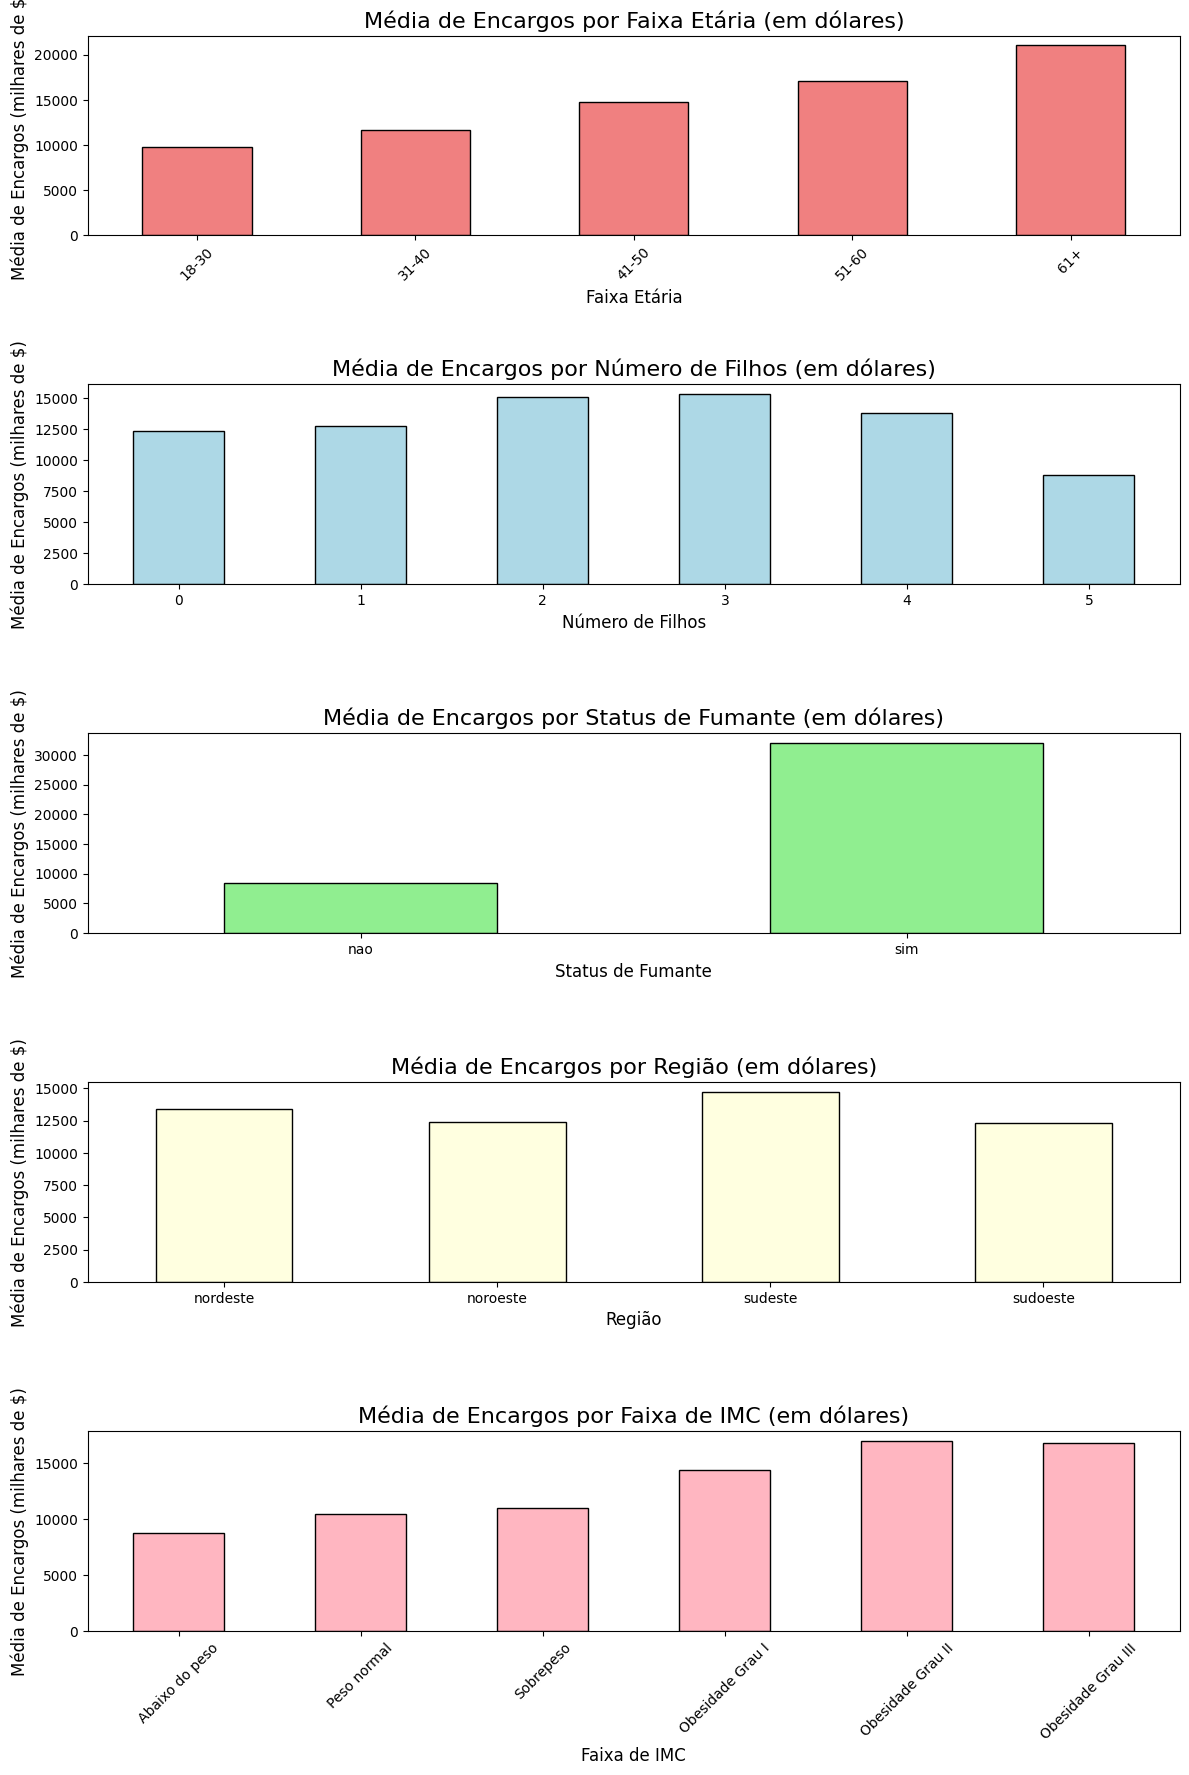

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o dataset
df = pd.read_csv('/content/sample_data/BaseMedica.csv')

# Remover espaços extras nos nomes das colunas
df.columns = df.columns.str.strip()

# Verificar as primeiras linhas do DataFrame para confirmar os nomes das colunas
print(df.head())

# Definir as faixas etárias conforme você indicou
faixas_etarias = pd.cut(df['idade'], bins=[18, 30, 40, 50, 60, 100], right=True, labels=["18-30", "31-40", "41-50", "51-60", "61+"])
df['faixa_etaria'] = faixas_etarias

# Criar faixas de IMC
faixas_imc = pd.cut(df['imc'], bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')], right=True,
                    labels=["Abaixo do peso", "Peso normal", "Sobrepeso", "Obesidade Grau I", "Obesidade Grau II", "Obesidade Grau III"])
df['faixa_imc'] = faixas_imc

# Calcular a média dos encargos por faixa etária
encargos_por_faixa_etaria = df.groupby('faixa_etaria')['encargos'].mean()

# Calcular a média dos encargos por número de filhos
encargos_por_filhos = df.groupby('filhos')['encargos'].mean()

# Calcular a média dos encargos por status de fumante
encargos_por_fumante = df.groupby('fumante')['encargos'].mean()

# Calcular a média dos encargos por região
encargos_por_regiao = df.groupby('regiao')['encargos'].mean()

# Calcular a média dos encargos por faixa de IMC
encargos_por_faixa_imc = df.groupby('faixa_imc')['encargos'].mean()

# Criar gráficos
plt.figure(figsize=(12, 20))

# Subplot para Faixa Etária x Média Encargos
plt.subplot(6, 1, 1)
encargos_por_faixa_etaria.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Média de Encargos por Faixa Etária (em dólares)', fontsize=16)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Média de Encargos (milhares de $)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Subplot para Filhos x Média Encargos
plt.subplot(6, 1, 2)
encargos_por_filhos.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Média de Encargos por Número de Filhos (em dólares)', fontsize=16)
plt.xlabel('Número de Filhos', fontsize=12)
plt.ylabel('Média de Encargos (milhares de $)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

# Subplot para Fumante x Média Encargos
plt.subplot(6, 1, 3)
encargos_por_fumante.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Média de Encargos por Status de Fumante (em dólares)', fontsize=16)
plt.xlabel('Status de Fumante', fontsize=12)
plt.ylabel('Média de Encargos (milhares de $)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

# Subplot para Região x Média Encargos
plt.subplot(6, 1, 4)
encargos_por_regiao.plot(kind='bar', color='lightyellow', edgecolor='black')
plt.title('Média de Encargos por Região (em dólares)', fontsize=16)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Média de Encargos (milhares de $)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

# Subplot para Faixa de IMC x Média Encargos
plt.subplot(6, 1, 5)
encargos_por_faixa_imc.plot(kind='bar', color='lightpink', edgecolor='black')
plt.title('Média de Encargos por Faixa de IMC (em dólares)', fontsize=16)
plt.xlabel('Faixa de IMC', fontsize=12)
plt.ylabel('Média de Encargos (milhares de $)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir os gráficos
plt.show()


FASE 2 - Modelagem

● Crie um modelo preditivo de regressão utilizando uma técnica à sua
escolha (por exemplo: Regressão Linear, Árvores de Decisão etc);

● Divida o conjunto de dados em conjuntos de treinamento e teste.

Treinamento e avaliação do modelo:
● Treine o modelo com o conjunto de treinamento.

Levando em consideração que a nossa amostragem de dados possui 1338 registros, utilizaremos o
padrão de divisão de 80% para treinamento e 20% para teste. Ficando 268 para teste, e 1070 para
treinamento.

Utilizaremos Regressão Linear como a técnica inicial para prever os encargos.

Ridge - RMSE: 5416.95, R²: 0.82
Lasso - RMSE: 5415.56, R²: 0.82


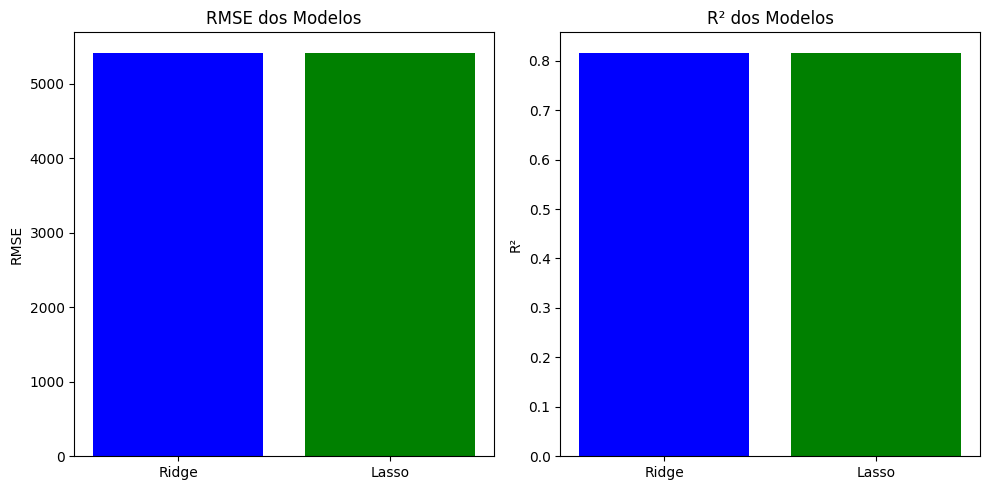

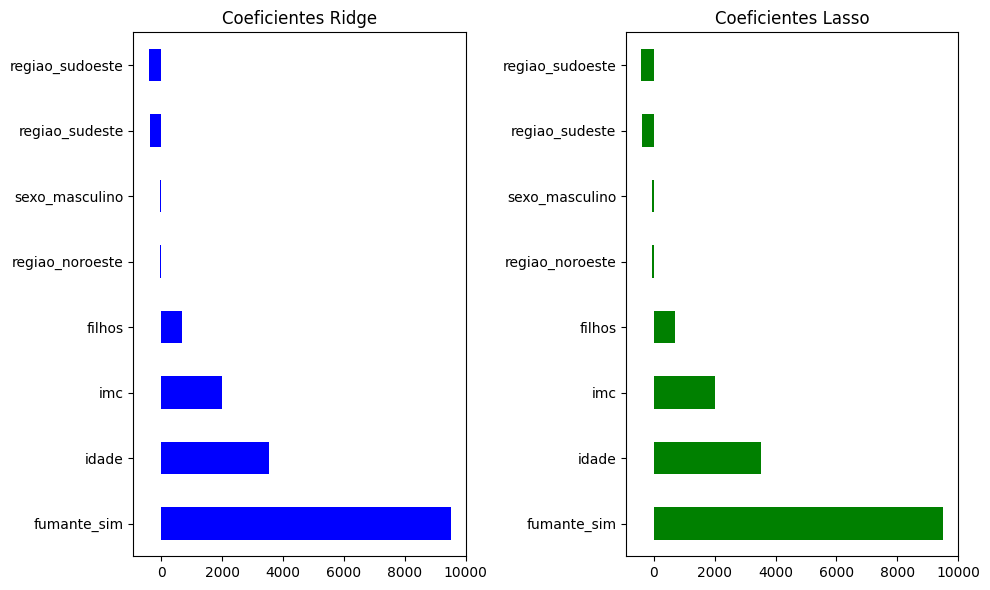

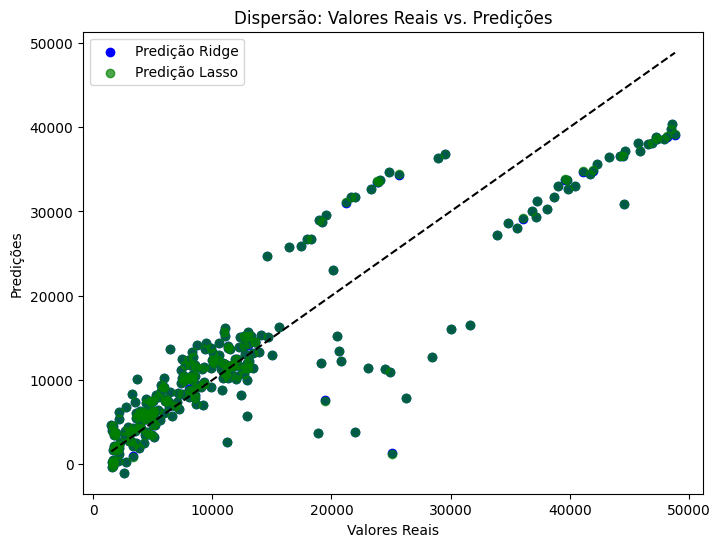

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Carregar o dataset
data = pd.read_csv('/content/sample_data/BaseMedica.csv')  # Caminho do seu dataset

# Transformando variáveis categóricas em variáveis numéricas (dummies para variáveis como sexo, fumante, região)
data = pd.get_dummies(data, columns=['sexo', 'fumante', 'regiao'], drop_first=True)

# Definindo as variáveis independentes (X) e dependente (y)
X = data.drop('encargos', axis=1)  # Todas as colunas, exceto 'encargos'
y = data['encargos']  # A variável dependente que queremos prever

# Dividindo os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalonando as variáveis independentes (Padronizando)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelos de Regularização - Lasso e Ridge
# Ridge (Regularização L2)
ridge = Ridge(alpha=1.0)  # Alpha é o parâmetro de regularização
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

# Lasso (Regularização L1)
lasso = Lasso(alpha=0.1)  # Alpha é o parâmetro de regularização
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

# Função para exibir coeficientes
def print_coefficients(model, X):
    coef = model.coef_
    features = X.columns
    coef_df = pd.DataFrame(coef, index=features, columns=['Coeficiente'])
    return coef_df.sort_values(by='Coeficiente', ascending=False)

# Avaliando os Modelos
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - RMSE: {rmse:.2f}, R²: {r2:.2f}")
    return rmse, r2

# Avaliando o modelo Ridge
rmse_ridge, r2_ridge = evaluate_model(y_test, y_pred_ridge, 'Ridge')
# Avaliando o modelo Lasso
rmse_lasso, r2_lasso = evaluate_model(y_test, y_pred_lasso, 'Lasso')

# Exibindo coeficientes
coef_ridge = print_coefficients(ridge, X)
coef_lasso = print_coefficients(lasso, X)

# Plotando as métricas de desempenho (RMSE e R²)
models = ['Ridge', 'Lasso']
rmse_values = [rmse_ridge, rmse_lasso]
r2_values = [r2_ridge, r2_lasso]

# Gráfico de RMSE
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(models, rmse_values, color=['blue', 'green'])
plt.title('RMSE dos Modelos')
plt.ylabel('RMSE')

# Gráfico de R²
plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color=['blue', 'green'])
plt.title('R² dos Modelos')
plt.ylabel('R²')

plt.tight_layout()
plt.show()

# Plotando os coeficientes
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
coef_ridge['Coeficiente'].plot(kind='barh', color='blue')
plt.title('Coeficientes Ridge')

plt.subplot(1, 2, 2)
coef_lasso['Coeficiente'].plot(kind='barh', color='green')
plt.title('Coeficientes Lasso')

plt.tight_layout()
plt.show()

# Plotando o gráfico de dispersão das previsões vs. valores reais
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, color='blue', label='Predição Ridge')
plt.scatter(y_test, y_pred_lasso, color='green', label='Predição Lasso', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
plt.title('Dispersão: Valores Reais vs. Predições')
plt.xlabel('Valores Reais')
plt.ylabel('Predições')
plt.legend()
plt.show()


**Métricas de Desempenho**

**Ridge - RMSE: 5416.95, R²: 0.82**

RMSE (Root Mean Squared Error): O RMSE é uma medida que indica a magnitude média do erro de previsão. Um valor de 5416.95 significa que, em média, as previsões do modelo de Ridge estão errando em torno de 5416.95 unidades em relação aos valores reais de encargos.

R² (Coeficiente de Determinação): O R² de 0.82 indica que o modelo de Ridge é capaz de explicar 82% da variabilidade nos encargos. Isso é um bom indicador de que o modelo está capturando bem a relação entre as variáveis independentes e a variável dependente.

Lasso - RMSE: 5415.56, R²: 0.82
Para o modelo Lasso, o RMSE é muito semelhante ao do Ridge (5415.56), o que significa que ambos os modelos têm um desempenho muito próximo em termos de erro médio.

O R² também é 0.82, o que sugere que o modelo de Lasso também explica 82% da variabilidade nos encargos, o que é bastante eficiente.

**Coeficientes**

Os coeficientes mostram a relação entre cada variável independente e a variável dependente (encargos). Vamos analisar cada um deles.

Ridge:
fumante_sim: 9506.60
Este coeficiente indica que, para um aumento de 1 unidade na variável fumante (sim), o valor de encargos aumenta em 9506.60 unidades. Ou seja, pessoas que fumam têm encargos significativamente mais altos, e isso é um dos maiores impactos do modelo.

idade: 3530.02
A idade tem um coeficiente positivo, o que significa que, conforme a idade aumenta em 1 ano, os encargos aumentam em 3530.02 unidades. Isso sugere que a idade tem uma relação direta com os encargos, possivelmente devido a um aumento no risco ou necessidades de saúde com o passar dos anos.

imc: 2010.93
O IMC (Índice de Massa Corporal) também tem um coeficiente positivo, indicando que, quanto maior o IMC, maior o valor dos encargos. O valor 2010.93 sugere que um aumento no IMC de 1 unidade resulta em um aumento nos encargos de aproximadamente 2010.93 unidades.

filhos: 683.09
A variável filhos tem um coeficiente positivo, o que significa que, com o aumento do número de filhos, os encargos também aumentam. Cada filho adicional está relacionado a um aumento de 683.09 unidades nos encargos.

regiao_noroeste: -46.38
A variável região_noroeste tem um coeficiente negativo, indicando que as pessoas que vivem na região noroeste têm encargos mais baixos em comparação com a região de referência (que provavelmente é a região "sudeste"). O valor de -46.38 sugere uma redução nos encargos quando a pessoa mora nessa região.

sexo_masculino: -54.57
O sexo_masculino tem um coeficiente ligeiramente negativo, sugerindo que, em comparação com o sexo feminino (referência), os homens têm encargos um pouco mais baixos. O valor de -54.57 é relativamente pequeno, indicando que a diferença entre os sexos não tem um grande impacto nos encargos.

regiao_sudeste: -378.06
A região sudeste também tem um coeficiente negativo, o que significa que morar na região sudeste está associado a um pequeno desconto nos encargos, em comparação com a região de referência.

regiao_sudoeste: -413.37
O coeficiente da região sudoeste também é negativo e mais forte do que o das outras regiões, indicando que essa região está associada a uma redução maior nos encargos, em relação à região de referência.

Lasso:
Os coeficientes do modelo Lasso são bastante semelhantes aos do Ridge, com pequenas variações. O Lasso tende a forçar alguns coeficientes a zero em comparação com o Ridge (não é o caso aqui), mas isso pode variar dependendo de como o parâmetro de regularização (alpha) é ajustado.

**Conclusão**

Ridge e Lasso produzem resultados muito semelhantes para esse dataset, com pequenas diferenças nos coeficientes, mas a tendência de cada variável permanece a mesma.
As variáveis como fumante e idade têm um impacto muito forte no valor dos encargos, enquanto as variáveis de região e sexo têm um impacto mais modesto.
RMSE e R² são bastante consistentes entre os dois modelos, com ambos mostrando um desempenho sólido, explicando 82% da variabilidade nos encargos.